In [35]:
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
import tensorflow as tf
from keras.utils import plot_model
import numpy as np
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

#df = pd.read_csv("/Users/sarenah/Documents/ST/MyProject/customer_satisfaction_data.csv", names= ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
data = pd.read_csv("/Users/sarenah/Documents/ST/MyProject/customer_satisfaction_data.csv")

#remove columns
data = data.drop(columns=["seq", "id"])

#missing value
data = data.dropna()

#outliers
Q1 = data['Departure Delay in Minutes'].quantile(0.25)  # 第一四分位數
Q3 = data['Departure Delay in Minutes'].quantile(0.75)  # 第三四分位數
IQR = Q3 - Q1  # 四分位距
print(IQR)

# 判定離群值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(data['Departure Delay in Minutes'])

# 找出離群值的索引
outliers = data[(data['Departure Delay in Minutes'] < lower_bound) | (data['Departure Delay in Minutes'] > upper_bound)]
print(outliers)
data = data[(data['Departure Delay in Minutes'] >= lower_bound) & (data['Departure Delay in Minutes'] <= upper_bound)]

#outliers
Q1_2 = data['Arrival Delay in Minutes'].quantile(0.25)  # 第一四分位數
Q3_2 = data['Arrival Delay in Minutes'].quantile(0.75)  # 第三四分位數
IQR_2 = Q3_2 - Q1_2  # 四分位距
print(IQR)

# 判定離群值
lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

print(data['Arrival Delay in Minutes'])

# 找出離群值的索引
outliers_2 = data[(data['Arrival Delay in Minutes'] < lower_bound) | (data['Arrival Delay in Minutes'] > upper_bound)]
print(outliers)
data = data[(data['Arrival Delay in Minutes'] >= lower_bound_2) & (data['Arrival Delay in Minutes'] <= upper_bound_2)]


12.0
0        1128
1         951
2         815
3         794
4         756
         ... 
25971       0
25972       0
25973       0
25974       0
25975       0
Name: Departure Delay in Minutes, Length: 25893, dtype: int64
      Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0       Male  Loyal Customer    8  Personal Travel       Eco             1144   
1     Female  Loyal Customer   39  Business travel  Business             1696   
2     Female  Loyal Customer   42  Business travel  Business              693   
3     Female  Loyal Customer   45  Personal Travel       Eco              630   
4     Female  Loyal Customer   24  Business travel  Business             2507   
...      ...             ...  ...              ...       ...              ...   
3564  Female  Loyal Customer   42  Business travel  Business             3135   
3565    Male  Loyal Customer   43  Personal Travel       Eco              240   
3566  Female  Loyal Customer   57  Business travel

In [47]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# 標準化
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

standardized_df = pd.DataFrame(data[numeric_columns], columns=data.columns)
print(standardized_df)

print(data)

       Gender  Customer Type       Age  Type of Travel  Class  \
3573      NaN            NaN  1.011536             NaN    NaN   
3593      NaN            NaN -0.771838             NaN    NaN   
3601      NaN            NaN -0.507635             NaN    NaN   
3602      NaN            NaN -0.441584             NaN    NaN   
3605      NaN            NaN -1.960754             NaN    NaN   
...       ...            ...       ...             ...    ...   
25971     NaN            NaN -1.564449             NaN    NaN   
25972     NaN            NaN -0.111329             NaN    NaN   
25973     NaN            NaN -1.564449             NaN    NaN   
25974     NaN            NaN -1.234195             NaN    NaN   
25975     NaN            NaN  1.672045             NaN    NaN   

       Flight Distance  Inflight wifi service  \
3573          0.360947                    NaN   
3593         -0.172314                    NaN   
3601          1.242073                    NaN   
3602          0.012085 

Accuracy: 0.9509090909090909
Precision: 0.954233409610984
Recall: 0.9386606640405177
F1-Score: 0.9463829787234043
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2073
           1       0.95      0.94      0.95      1777

    accuracy                           0.95      3850
   macro avg       0.95      0.95      0.95      3850
weighted avg       0.95      0.95      0.95      3850



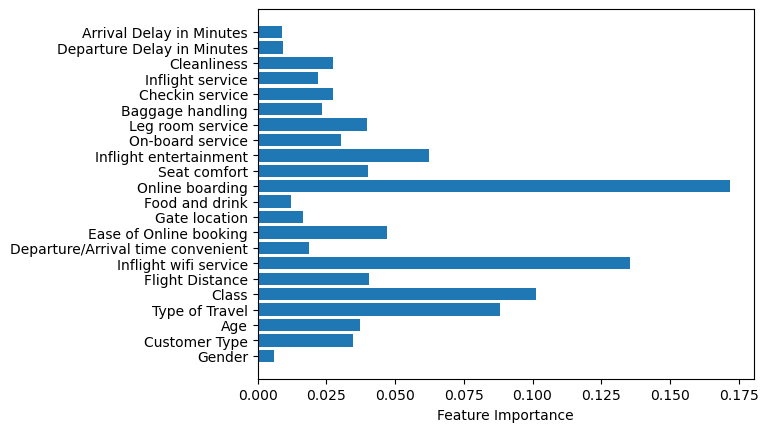

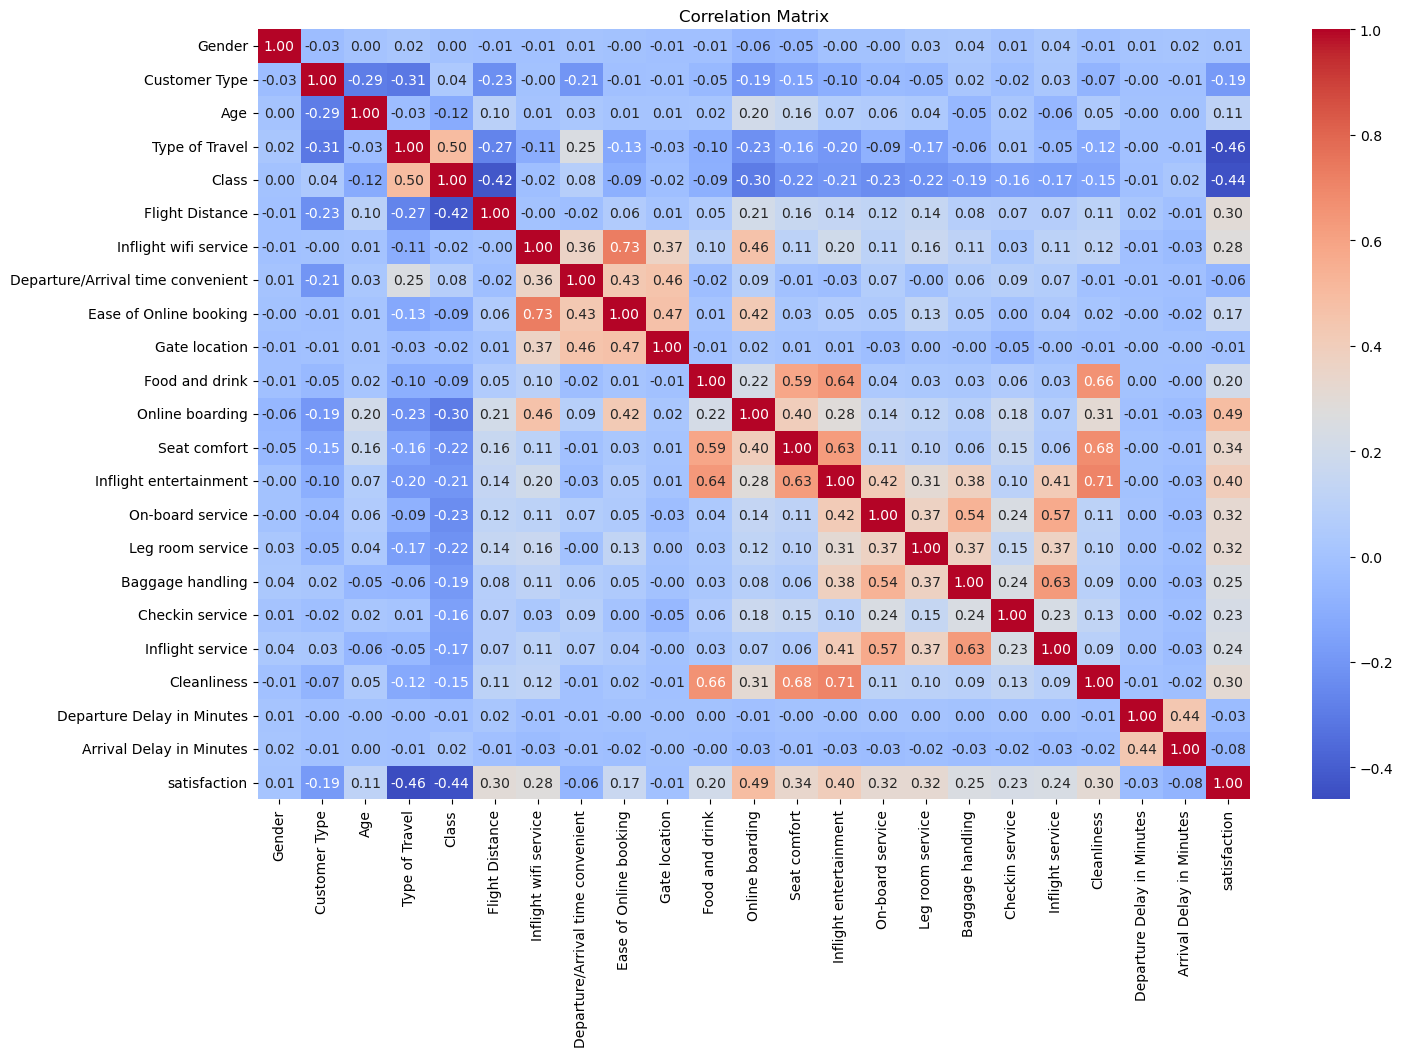

In [49]:
label_encoders = {}
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(columns=["satisfaction"])  # 特徵
y = data["satisfaction"]  # 目標變數

scaler = StandardScaler()
X = scaler.fit_transform(X)
#print(X)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#import joblib
#joblib.dump(model, "satisfaction_model.pkl")

import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
plt.barh(data.drop(columns="satisfaction").columns, feature_importances)
plt.xlabel("Feature Importance")
plt.show()


correlation_matrix = data.corr()  # 計算相關矩陣
#print(correlation_matrix)  # 印出相關矩陣

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))  # 設定圖表大小
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()